Nama : Kresna Prayoga<br>
NIM : 211351071<br>
Kelas : Malam A

# import Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kresnaprayoga","key":"4dc27a302ba1557b5efa3fb738674ed1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 77.5MB/s]


In [5]:
!mkdir groceries-dataset
!unzip groceries-dataset
!ls groceries-dataset

Archive:  groceries-dataset.zip
  inflating: Groceries_dataset.csv   


# import library yang digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Groceries_dataset.csv',parse_dates = ['Date'])

# Data Discovery

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# EDA (minimal 5)

In [ ]:
transactions = df.groupby(['Member_number', 'Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          2014-06-24                3
              2015-03-15                4
              2015-05-27                2
              2015-07-24                2
              2015-11-25                2
...                                   ...
4999          2015-05-16                2
              2015-12-26                2
5000          2014-09-03                2
              2014-11-16                2
              2015-10-02                3

[14963 rows x 1 columns]

In [9]:
freq = (df['itemDescription'].value_counts())
freq.head()

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: itemDescription, dtype: int64

In [11]:
freq = df['itemDescription'].value_counts()

pd.set_option('display.max_rows', None)
print(freq)

whole milk                   2502
other vegetables             1898
rolls/buns                   1716
soda                         1514
yogurt                       1334
root vegetables              1071
tropical fruit               1032
bottled water                 933
sausage                       924
citrus fruit                  812
pastry                        785
pip fruit                     744
shopping bags                 731
canned beer                   717
bottled beer                  687
whipped/sour cream            662
newspapers                    596
frankfurter                   580
brown bread                   571
pork                          566
domestic eggs                 566
butter                        534
fruit/vegetable juice         518
beef                          516
curd                          514
margarine                     491
coffee                        476
frozen vegetables             425
chicken                       422
white bread   

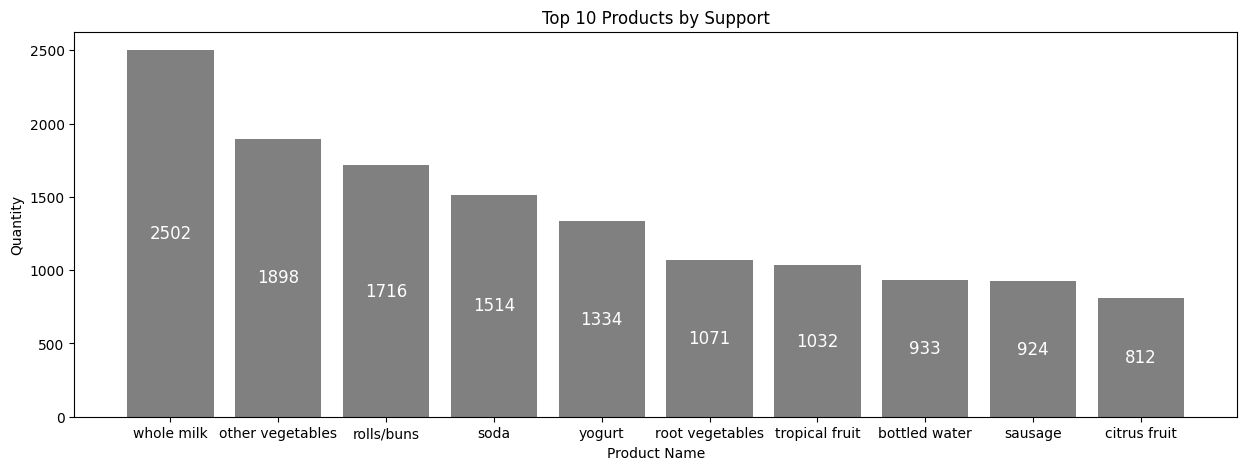

In [ ]:
plt.figure(figsize = (15,5))
bars = plt.bar(x = np.arange(len(freq.head(10))), height = (freq).head(10),color='grey')
plt.bar_label(bars, fontsize=12, color='white', label_type = 'center')
plt.xticks(ticks = np.arange(len(freq.head(10))), labels = freq.index[:10])

plt.title('Top 10 Products by Support')
plt.ylabel('Quantity')
plt.xlabel('Product Name')
plt.show()

In [ ]:
member_shopping_frequency = df.groupby('Member_number')['Date'].count().sort_values(ascending=False)
print(member_shopping_frequency)

Member_number
3180    36
3737    33
3050    33
2051    33
3915    31
        ..
3533     2
2302     2
4824     2
1084     2
3377     2
Name: Date, Length: 3898, dtype: int64


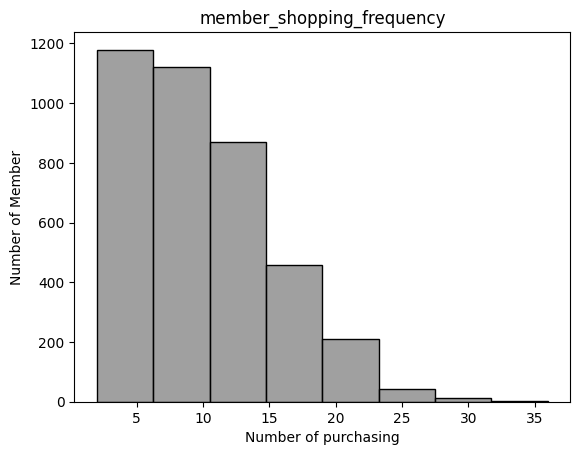

In [ ]:
sns.histplot(member_shopping_frequency, bins=8, kde=False,color='grey')
plt.xlabel('Number of purchasing')
plt.ylabel('Number of Member')
plt.title('member_shopping_frequency')
plt.show()

# Preprocessing

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format= "%Y-%m-%d")

df["Date"].dtype

dtype('<M8[ns]')

In [ ]:
df["month"] = df['Date'].dt.month
df["day"] = df['Date'].dt.day
df["year"] = df['Date'].dt.year
df.head()

,Member_number,Date,itemDescription,month,day,year
0,1808,2015-07-21,tropical fruit,7,21,2015
1,2552,2015-05-01,whole milk,5,1,2015
2,2300,2015-09-19,pip fruit,9,19,2015
3,1187,2015-12-12,other vegetables,12,12,2015
4,3037,2015-01-02,whole milk,1,2,2015


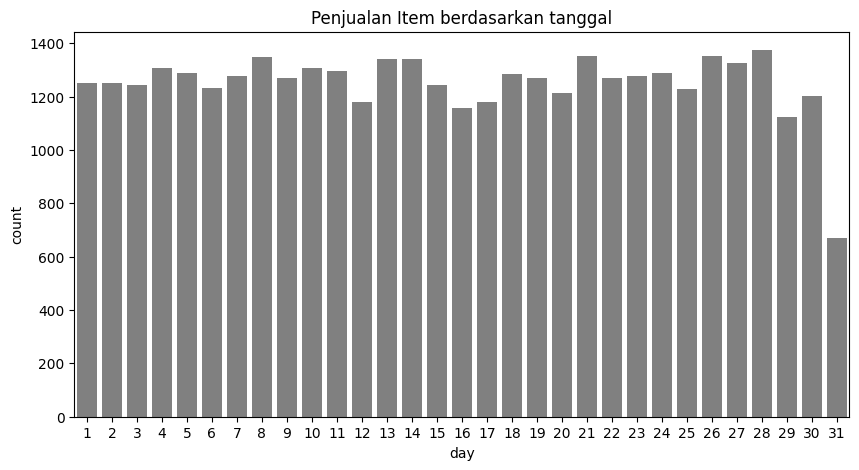

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df,color='grey')
plt.title('Penjualan Item berdasarkan tanggal')
plt.show()

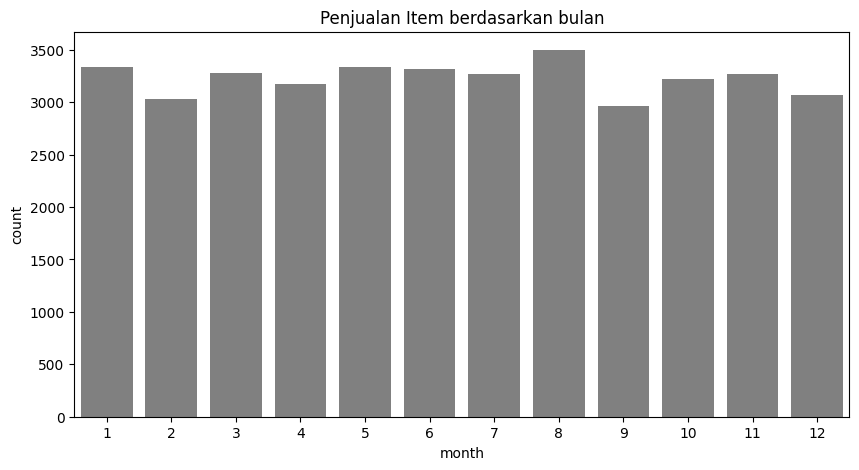

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df,color='grey')
plt.title('Penjualan Item berdasarkan bulan')
plt.show()

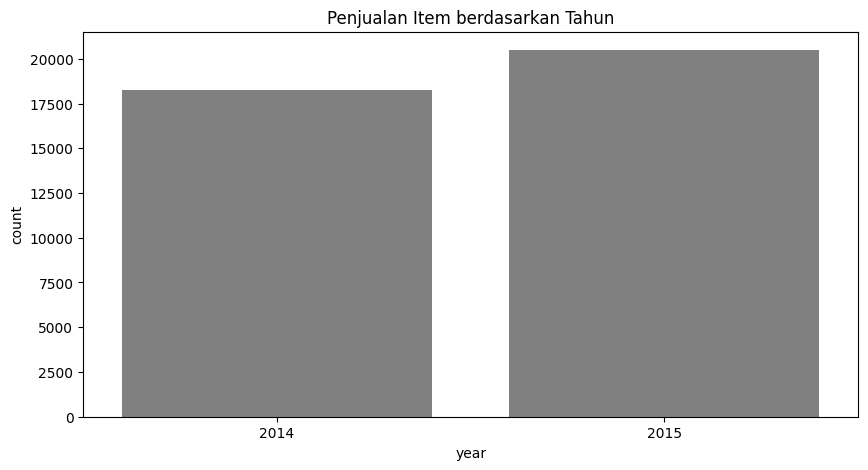

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='year',data=df,color='grey')
plt.title('Penjualan Item berdasarkan Tahun')
plt.show()

# modeling

In [ ]:
item_count = df.groupby(["Member_number", "itemDescription"])["itemDescription"].count().reset_index(name="Count")
item_count.head(10)

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
5,1000,salty snack,1
6,1000,sausage,2
7,1000,semi-finished bread,1
8,1000,soda,1
9,1000,whole milk,2


In [ ]:
item_count_pivot = item_count.pivot_table(index='Member_number', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)
print("ukuran dataset : ", item_count_pivot.shape)
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head(5)

ukuran dataset :  (3898, 167)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [ ]:
def encode(x):
    if x <=0:
        return 0
    elif x >= 1:
        return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print("ukuran dataset : ", item_count_pivot.shape)
print("jumlah transaksi : ", item_count_pivot.shape[0])
print("jumlah item : ", item_count_pivot.shape[1])

ukuran dataset :  (3898, 167)
jumlah transaksi :  3898
jumlah item :  167


In [ ]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

,support,itemsets
113,0.458184,(whole milk)
69,0.376603,(other vegetables)
84,0.349666,(rolls/buns)
94,0.313494,(soda)
114,0.282966,(yogurt)
106,0.233710,(tropical fruit)
85,0.230631,(root vegetables)
7,0.213699,(bottled water)
89,0.206003,(sausage)
1050,0.191380,"(other vegetables, whole milk)"


In [ ]:
metric = "lift"
min_treshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_treshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
7021,"(meat, domestic eggs)",(whole milk),0.010262,0.784314,1.711789
5710,"(fruit/vegetable juice, chocolate)",(whole milk),0.010775,0.750000,1.636898
15143,"(other vegetables, bottled water, rolls/buns, ...",(whole milk),0.010518,0.745455,1.626978
11632,"(bottled water, pip fruit, yogurt)",(whole milk),0.010262,0.740741,1.616689
11997,"(rolls/buns, brown bread, yogurt)",(whole milk),0.012827,0.735294,1.604802
11127,"(other vegetables, bottled water, brown bread)",(whole milk),0.012057,0.723077,1.578138
11100,"(bottled beer, rolls/buns, yogurt)",(whole milk),0.013853,0.720000,1.571422
12808,"(soda, curd, yogurt)",(whole milk),0.010775,0.711864,1.553666
15203,"(other vegetables, rolls/buns, shopping bags, ...",(whole milk),0.010005,0.709091,1.547613
12893,"(rolls/buns, sausage, domestic eggs)",(whole milk),0.010518,0.706897,1.542823


In [ ]:
metric = "lift"
min_treshold = 2

rules = association_rules(frequent_items, metric=metric, min_threshold=min_treshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
36,"(bottled water, rolls/buns, yogurt)","(other vegetables, whole milk)",0.010518,0.398058,2.079934
60,"(rolls/buns, shopping bags, yogurt)","(other vegetables, whole milk)",0.010005,0.397959,2.079417
42,"(other vegetables, sausage, yogurt)","(whole milk, rolls/buns)",0.013597,0.365517,2.047107
17,"(other vegetables, frozen meals)","(whole milk, rolls/buns)",0.010005,0.361111,2.022430
45,"(other vegetables, rolls/buns, sausage)","(whole milk, yogurt)",0.013597,0.325153,2.159196
15,"(curd, sausage)","(whole milk, yogurt)",0.010005,0.312000,2.071850
19,"(frozen meals, whole milk)","(other vegetables, rolls/buns)",0.010005,0.307087,2.092699
64,"(other vegetables, rolls/buns, shopping bags)","(whole milk, yogurt)",0.010005,0.304688,2.023291
40,"(whole milk, sausage, yogurt)","(other vegetables, rolls/buns)",0.013597,0.302857,2.063876
58,"(whole milk, shopping bags, yogurt)","(other vegetables, rolls/buns)",0.010005,0.302326,2.060254


# Visualisasi hasil algoritma

<Axes: xlabel='confidence', ylabel='lift'>

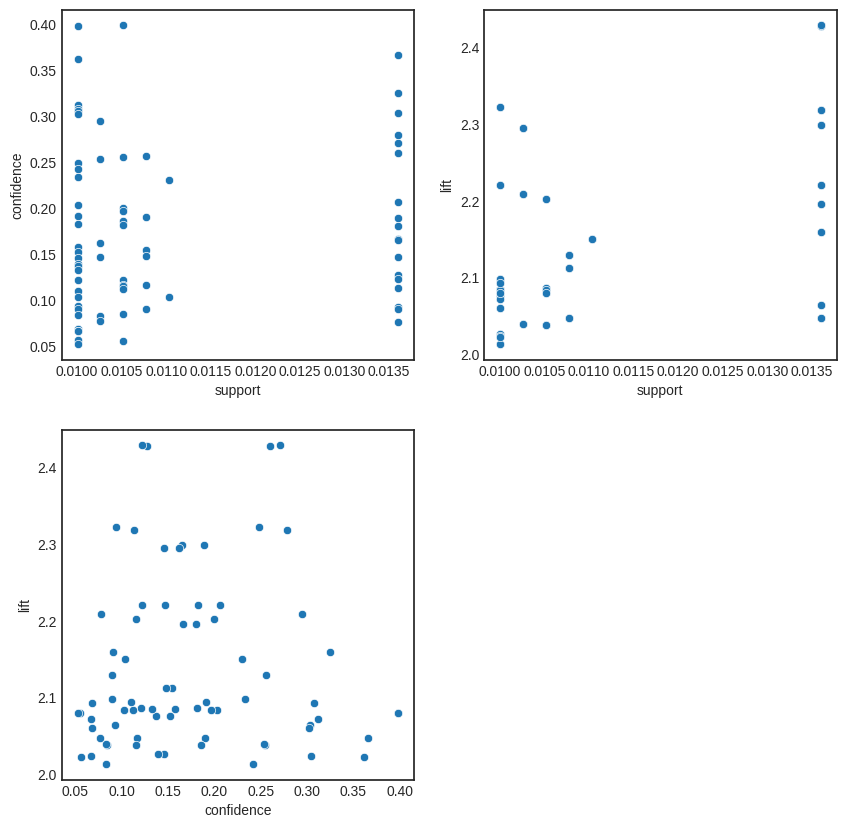

In [ ]:
plt.figure(figsize = (10, 10))
plt.style.use('seaborn-white')

plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)

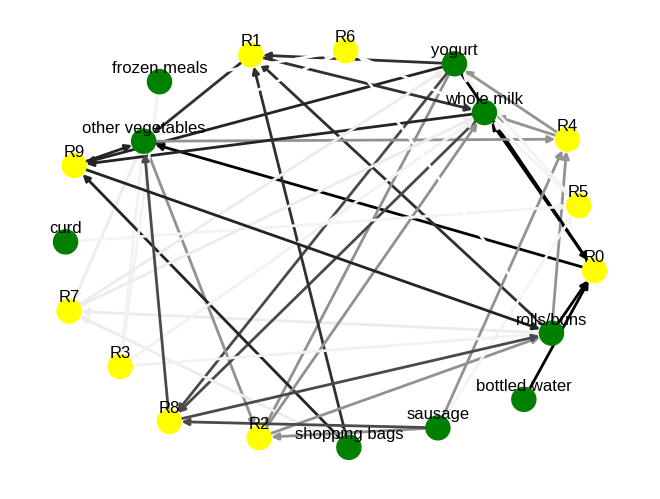

In [ ]:
def draw_graph(rules, rules_to_show):

  G1 = nx.DiGraph()

  color_map=[]
  N = 50
  colors = np.random.rand(N)
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']


  for i in range (rules_to_show):
    G1.add_nodes_from(["R"+str(i)])


    for a in rules.iloc[i]['antecedents']:

        G1.add_nodes_from([a])

        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in rules.iloc[i]['consequents']:

            G1.add_nodes_from([a])

            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

  for node in G1:
       found_a_string = False
       for item in strs:
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')



  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]

  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Calling function with 10 rules
draw_graph(rules, 10)

In [ ]:
code 3

# save model (pickle)

In [ ]:
code 1

In [ ]:
code 2

In [ ]:
code 3